In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-dataset-activity/sample_submission.csv
/kaggle/input/regression-dataset-activity/train.csv
/kaggle/input/regression-dataset-activity/test.csv


In [4]:
# Load your dataset
train_data = pd.read_csv('/kaggle/input/regression-dataset-activity/train.csv')
test_data = pd.read_csv('/kaggle/input/regression-dataset-activity/test.csv')

In [5]:
display(train_data)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,131.0,12.5,0.25,0.25,0.38,0.38,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.402948,0.400298,30.662187,4062.73953
1,1,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.490966,0.445497,35.513713,5722.57676
2,2,696.0,25.0,0.50,0.38,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.493693,0.433081,35.184412,6072.83443
3,3,567.0,25.0,0.50,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.340822,0.377915,28.867738,3998.05416
4,4,463.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.429092,0.406618,31.274591,4926.27902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,159.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.566414,0.466183,37.331606,5663.06579
14996,14996,187.0,12.5,0.25,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.543969,0.461904,37.629774,6749.51819
14997,14997,776.0,25.0,0.50,0.38,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.476178,0.436346,35.414082,5732.24032
14998,14998,167.0,12.5,0.25,0.25,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.442869,0.427277,33.340129,4905.49871


In [6]:
# Exploratory Data Analysis (EDA)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [7]:
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

#For test data
missing_values = test_data.isnull().sum()
print("Missing Values in test dataset:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)
Missing Values in test dataset:
 Series([], dtype: int64)


There seems to be no missing values in training and test datasets. 

In [8]:
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


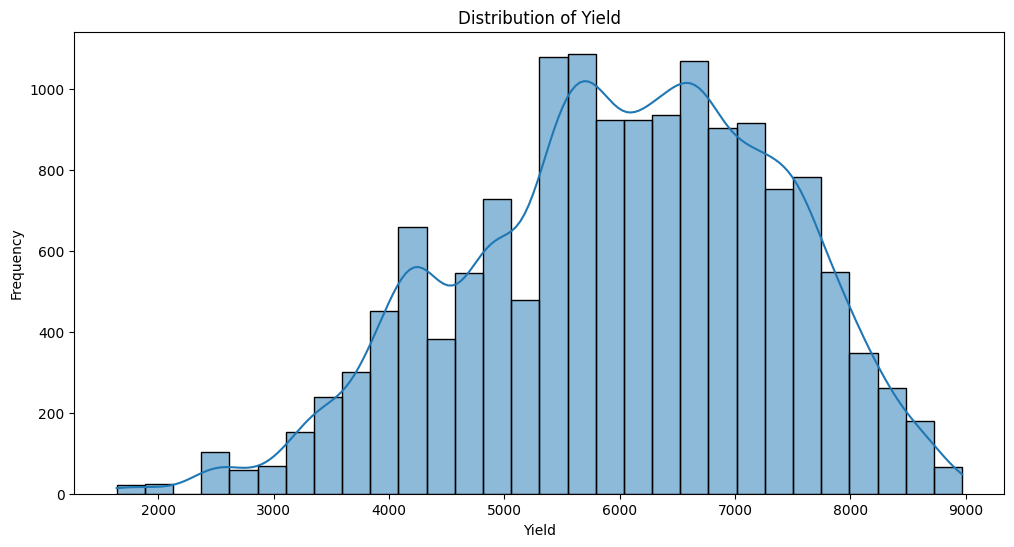

In [9]:
# Distribution of target variable (yield in this case)
plt.figure(figsize=(12, 6))
sns.histplot(train_data['yield'], bins=30, kde=True)
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.savefig('distribution_yield.png')
plt.show()

In [10]:
stats_summary = train_data['yield'].describe()
# Checking for skewness and kurtosis
skewness = train_data['yield'].skew()
kurtosis = train_data['yield'].kurt()
stats_summary, skewness, kurtosis

(count    15000.000000
 mean      6010.121206
 std       1357.564870
 min       1637.704020
 25%       5061.720610
 50%       6107.382470
 75%       7041.380180
 max       8969.401840
 Name: yield, dtype: float64,
 -0.3197041640536194,
 -0.3789621459870265)

Looking at the histogram, we can observe that the distribution is slightly skewed to the left which indicates that there are a few higher yield values that are pulling the mean to the left. The mean yield is likely to be slightly lower than the median due to the left-skewness. The majority of yields fall within the range of 4000 to 7000, with a smaller number of yields below 4000 and above 7000. The distribution is still quite symmetric, with only a mild negative skew.

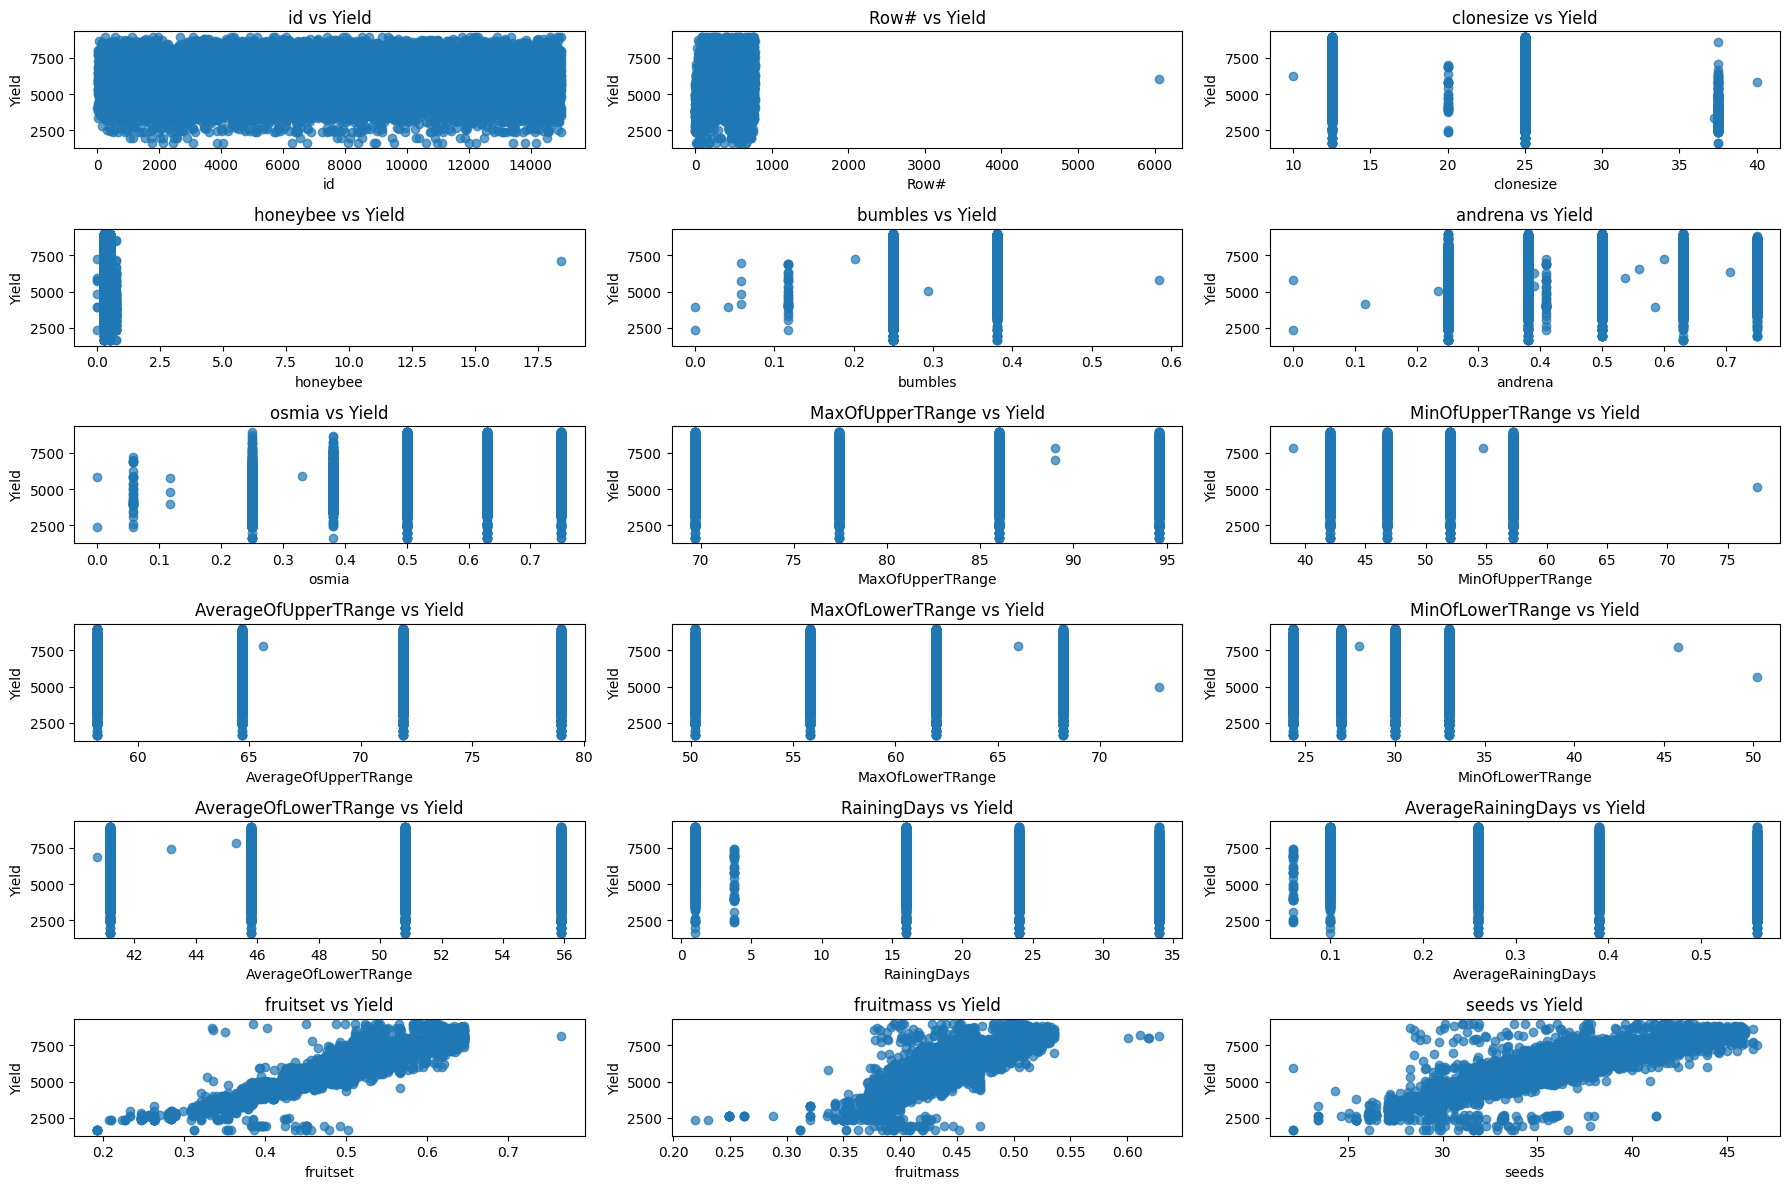

In [11]:
# Visualize relationships between features and target variable, yield
features = train_data.columns.drop('yield')

# Plotting a grid of subplots which shows the relationship between yield and all other parameters.
ncols = 3
nrows = (len(features) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()  # Flatten the grid of axes for easier iteration

# Iterate over each feature and create a scatter plot
for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['yield'], alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Yield')
    axes[i].set_title(f'{feature} vs Yield')

# Hide any unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

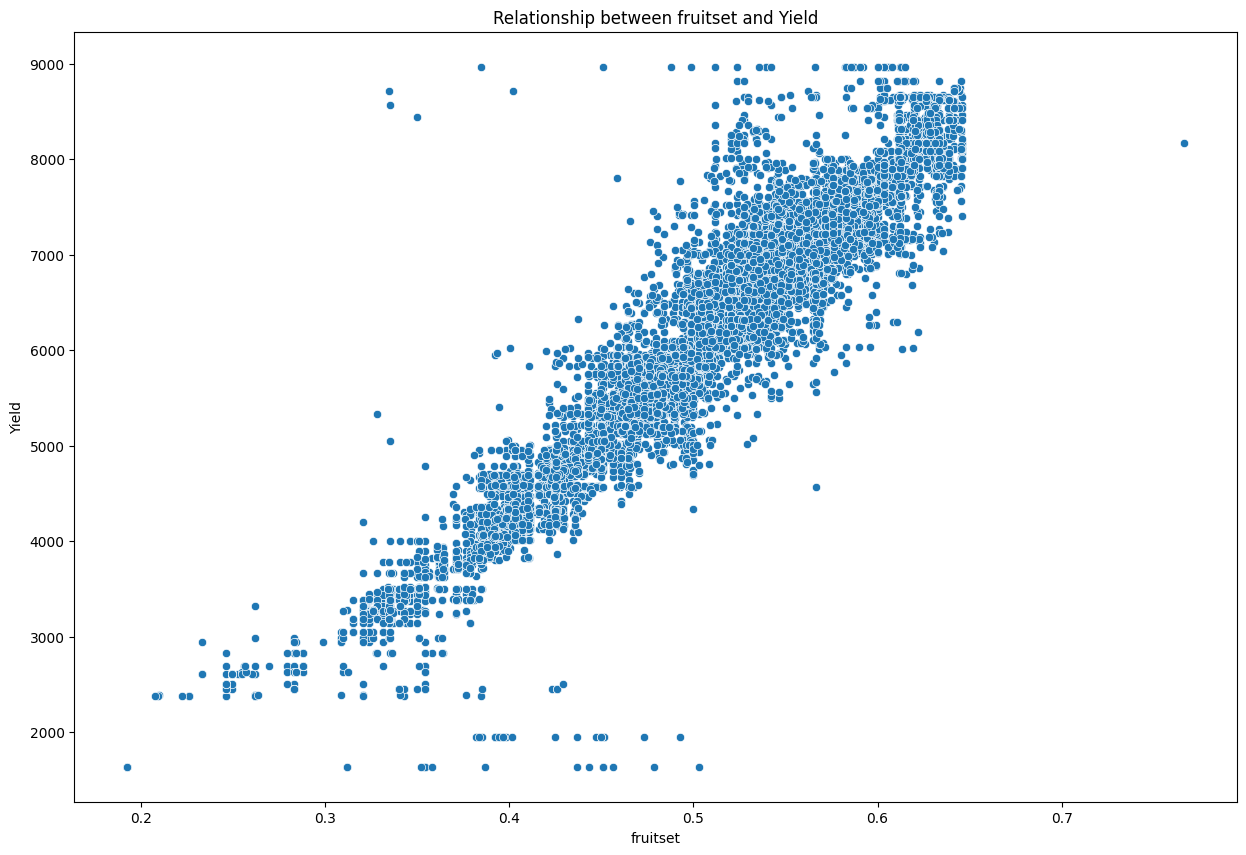

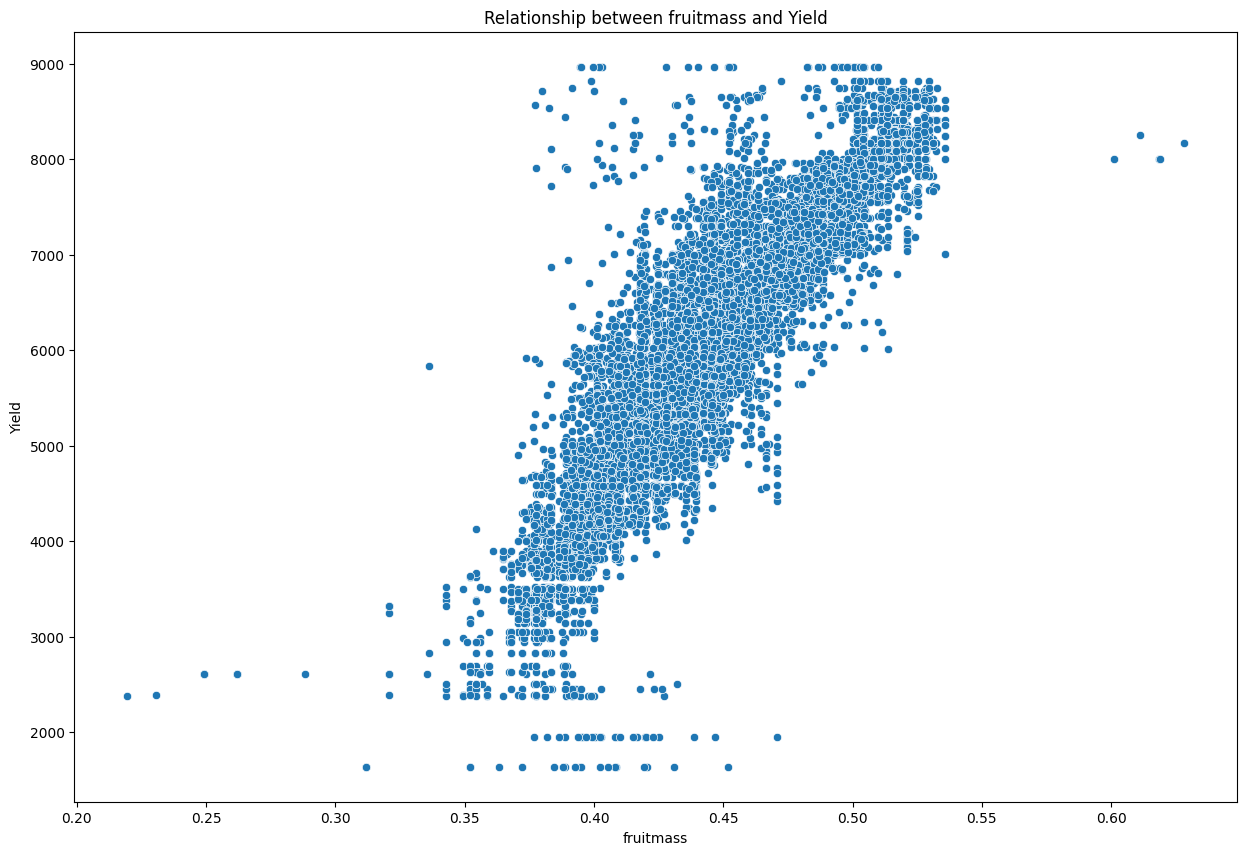

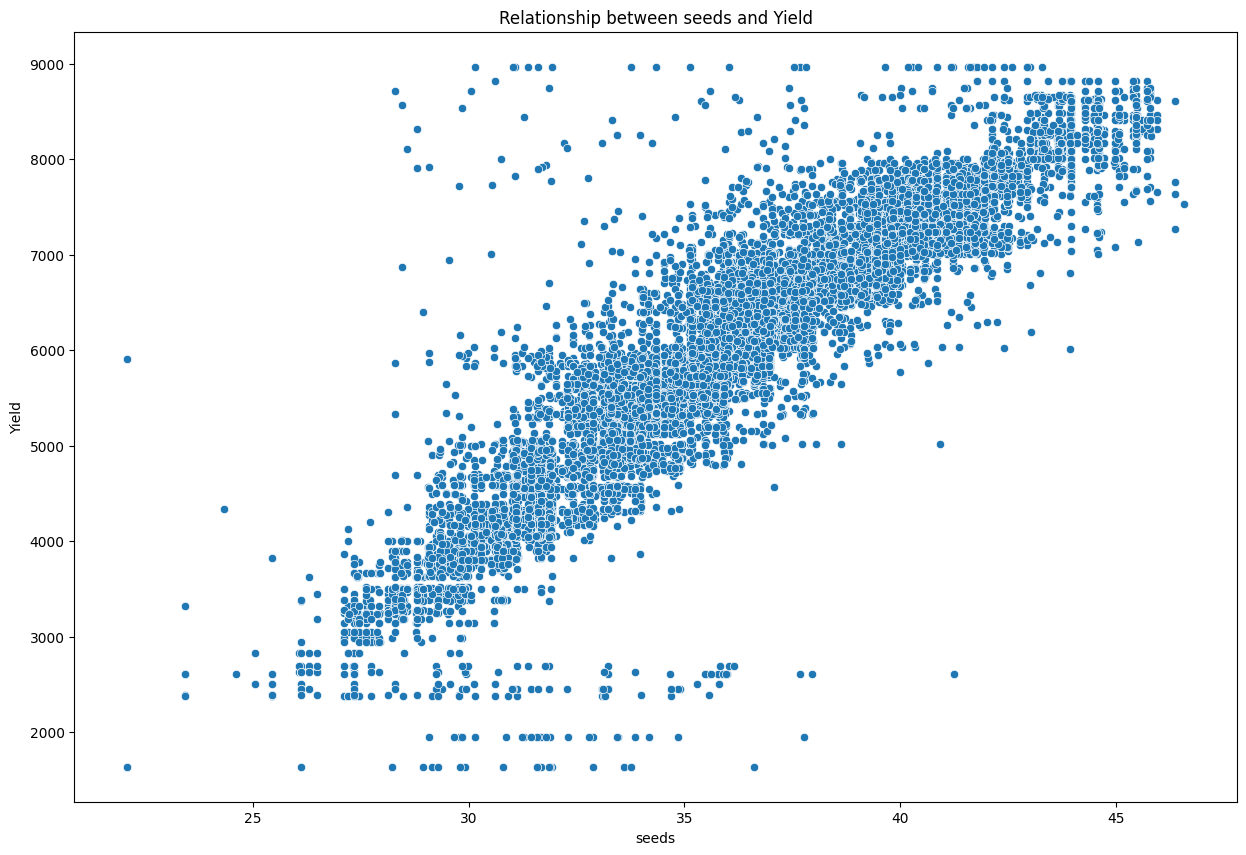

In [10]:
features = ['fruitset', 'fruitmass', 'seeds']  

for feature in features:
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data=train_data, x=feature, y='yield')
    plt.title(f'Relationship between {feature} and Yield')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.show()

In [29]:
from scipy.stats import pearsonr

# Example for fruitmass and yield
correlation, _ = pearsonr(train_data['fruitset'], train_data['yield'])
print(f'Correlation between fruitset and yield: {correlation:.2f}')

Correlation between fruitset and yield: 0.95


In [30]:
correlation, _ = pearsonr(train_data['fruitmass'], train_data['yield'])
print(f'Correlation between fruitmass and yield: {correlation:.2f}')

Correlation between fruitmass and yield: 0.89


In [31]:
correlation, _ = pearsonr(train_data['seeds'], train_data['yield'])
print(f'Correlation between seeds and yield: {correlation:.2f}')

Correlation between seeds and yield: 0.91


We see that all the three plots show strong positive correlation. All three features (fruitset, fruitmass, seeds) are significant predictors of yield due to their high correlation coefficients. The strongest predictor is fruitset, followed closely by seeds and then fruitmass. Further analysis (like feature importance using Gradient Boosting or XGBoost) is required since these factors alone are not enough to undertand the relationships clearly.

--------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Separate features and target variable
X = train_data.drop(columns=['yield'])  # Features
y = train_data['yield']                  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [13]:
#Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)    # X is your feature matrix
test_pca = pca.transform(test_scaled)

In [17]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize all models which can be applied in this case
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

# Train models and store them for later evaluation
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

We will do hyperparameter tuning for Random Forest, Gradient Boosting Regressor, SVR and XGBoost.

In [22]:
# Hyperparameter tuning for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print("Best parameters for Random Forest:", rf_grid_search.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [21]:
# Hyperparameter tuning for Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
gb_model = GradientBoostingRegressor()
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
# Hyperparameter tuning for XGBoost Regressor
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 5]
}
xgb_model = XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}


In [19]:
# Hyperparameter tuning for SVR
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1],
    'kernel': ['linear', 'rbf']
}
svr_model = SVR()
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train, y_train)
best_svr_model = svr_grid_search.best_estimator_
print("Best parameters for SVR:", svr_grid_search.best_params_)

Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}


Each model's performance is evaluated and printed out using RMSE and R² score

In [23]:
# Evaluate all models including the best ones from tuning
def evaluate_model(model):
    predictions = model.predict(X_val)
    rmse = mean_squared_error(y_val, predictions, squared=False)
    r2 = r2_score(y_val, predictions)
    return rmse, r2

results = {}
for name in models.keys():
    if name == 'Random Forest':
        rmse_rf, r2_rf = evaluate_model(best_rf_model)
        results[name] = (rmse_rf, r2_rf)
        print(f"{name} - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")
        
    elif name == 'Gradient Boosting':
        rmse_gb, r2_gb = evaluate_model(best_gb_model)
        results[name] = (rmse_gb, r2_gb)
        print(f"{name} - RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}")

    elif name == 'XGBoost':
        rmse_xgb, r2_xgb = evaluate_model(best_xgb_model)
        results[name] = (rmse_xgb, r2_xgb)
        print(f"{name} - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

    elif name == 'SVR':
        rmse_svr, r2_svr = evaluate_model(best_svr_model)
        results[name] = (rmse_svr, r2_svr)
        print(f"{name} - RMSE: {rmse_svr:.2f}, R²: {r2_svr:.2f}")

    else:
        rmse_lr, r2_lr = evaluate_model(models[name])
        results[name] = (rmse_lr, r2_lr)
        print(f"{name} - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression - RMSE: 479.92, R²: 0.87
Decision Tree - RMSE: 640.75, R²: 0.78
Random Forest - RMSE: 453.50, R²: 0.89
Gradient Boosting - RMSE: 438.90, R²: 0.90
SVR - RMSE: 480.77, R²: 0.87
XGBoost - RMSE: 439.81, R²: 0.89


Comments on Model Performance:
- The Gradient Boosting Regressor outperformed all other models in terms of both RMSE and R², demonstrating superior predictive power and a strong ability to explain the variability in yield data.
- The XGBoost model was almost as good as the Gradient Boosting Regressor at predicting the outcome. It was a little less accurate, but it was much faster. This makes it a good choice if we need quick and accurate predictions, especially when dealing with a lot of data.
- The Random Forest model performed well, with a prediction error that was close to, but slightly higher than, the Gradient Boosting and XGBoost models. Its ability to handle complex relationships between variables makes it a reliable option for regression tasks.
- The Linear Regression model did a good job, but not as good as the other models. It could explain some of the things that were happening in the data, but it might not have been able to understand all the complicated relationships. The other models, like Random Forest and Gradient Boosting, performed better.
- The SVR model didn't perform much better than the Linear Regression model. This might mean that it's not the best choice for this type of data.
- The Decision Tree model didn't do as well as the other models. Its high RMSE and low R² score indicate that it may be either overfitting the training data, leading to poor generalization, or underfitting, failing to capture the underlying patterns effectively.

Predictions are made using the best model, and results are saved to a separate CSV file. We use Gradient Boosting Regressor model. XGBoost or Random Forest model can also be used.

In [25]:
# Predict on Test Data using the best model (Both Random Forest or Gradient Boosting Regressor can be used.)
test_predictions = best_gb_model.predict(test_pca)  # Using the Gradient Boosting Regressor model based on evaluation

submission = pd.DataFrame({
    'id': test_data['id'],
    'yield': test_predictions
})

submission.to_csv('submission.csv', index=False)  # Save predictions for Random Forest model


In [26]:
display(submission)

,id,yield
0,15000,5978.430835
1,15001,7398.341800
2,15002,3658.863229
3,15003,7316.035656
4,15004,7502.801738
...,...,...
9995,24995,7728.442241
9996,24996,6713.750525
9997,24997,5636.164706
9998,24998,6636.628670


----------------------------------------------------------------------------------------------------------------------------